<a href="https://colab.research.google.com/github/fcastellanosp/MINE-4206_202510_AML/blob/main/Laboratorios/Laboratorio_2/MINE_4206_202510_AML_Lab2_S2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

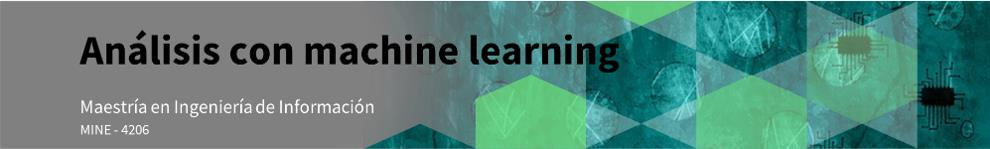

**Tutores**.
* Nicolás Tibatá Casteñeda.
* Fabián Camilo Castellanos P.

#Tabla de contenido

[Contexto y objetivos.](scrollTo=opGTmPf8s2Fw)<br>
[Entendimiento del negocio.](#scrollTo=mvUzsZbk4y-4)<br>
[0. Instalación de librerías.](#scrollTo=gjQDyeHN5Lib)<br>
[1. Importar librerías](#scrollTo=KXlOoHGx6Fdz)<br>
[2. Introducción a los datos.](#scrollTo=6OKhZATq6Jlt)<br>
[3. Modelamiento.](#scrollTo=fy59XxXphe_L)<br>
[4. Despliegue.](#scrollTo=3LDd8wPh2Z70)<br>
[5. Preguntas.](#scrollTo=npdolSB5h7np)<br>

---
# Contexto y objetivos.

Las agencias de viaje a raíz de la pandemia quieren incursionar en el negocio de los seguros de viaje, por esta razón ha recolectado la información de sus clientes para identificar las acciones de mejora e implementar nuevas estrategias para la adquisición de este tipo de seguros.



**Objetivos:**

* Resolver un problema de Aprendizaje de Datos.
* Revisar los conceptos básicos de una clasificación.
* Comprender el comportamiento de los clientes e identificar oportunidades de mejora.

La fuente de los datos la puedes encontrar en [Travel insurance prediction data](https://www.kaggle.com/datasets/tejashvi14/travel-insurance-prediction-data).



# Entendimiento del negocio.

Para tener un mejor detalle sobre el comportamiento de las variables, solicitamos a la organización el diccionario de datos y nos suministró la siguiente información:

| ATRIBUTO | DEFINICIÓN |
| :- | :- |
| **Age** | Edad del cliente.|
| **Employment Type** | Tipo de empleo del cliente.|
| **GraduateOrNot** | Indica si el cliente está o no graduado.|
| **AnnualIncome** | Ingreso anual del cliente en rupias indias [redondeado a 50 mil rupias].|
| **FamilyMembers** | Número de miembros en la familia del cliente.|
| **ChronicDiseases** | Relaciona si hay alguna enfermedad o condición en el cliente.|
| **FrequentFlyer** | Información del historial del cliente para reservas de boletos en al menos 4 ocasiones distintas en los 2 últimos años. |
| **EverTravelledAbroad** | Relaciona si el cliente alguna vez ha viajado a un país extranjero, no necesariamente usando los servicios de la empresa.|
| **TravelInsurance** | Indica si el cliente compró un paquete de seguro de viaje durante la oferta del último año.|

---
# 0. Instalación de librerías.

Análisis profundo de datos

In [1]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 29.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=d63f3ed9ae11727ff70e95b871207af1e95cb9005c3de4da129050b99ef6964b
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


Entendiendo que la organización publicó la información en kaggle, requerimos hacer uso de la librería para acceder a la información.

In [2]:
!pip install kaggle

---
# 1. Importar librerías

In [3]:
#Manejo de datos
import pandas as pd
import numpy as np

#Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Analisis profundo de datos
from ydata_profiling import ProfileReport

#Entrenamiento del modelo
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

#Apoyo de estadísticas con scipy
import scipy.stats as stats

#Librerías extras
import joblib

from datetime import datetime

print(f"La versión de sklearn es: {sklearn.__version__}")

La versión de sklearn es: 1.6.1


---
# 2. Introducción a los datos.

##2.1. Parámetros generales y carga de la información.

In [4]:
#Porcentaje para validación y test
test_val_alpha = 0.2
#random_state o semilla para la reproducibilidad
my_seed = 19

## 2.2. Configuración del entorno de kaggle.

La información se encuentra dispuesta en la plataforma kaggle. Para asegurar el acceso a los datos de forma automatizada en el notebook, vamos a importar la librería e iniciar las acciones que permitan conectarnos con el repositorio. Previamente deberás generar el archivo JSON con las opciones del [API](https://www.kaggle.com/settings).

Para la ejecución correcta del notebook, deberás cargar el archivo de las credenciales, e iniciar el proceso de preparación, el cuál consiste en verificar permisos del archivo, existencia del mismo, preparar una carpeta específica con nombre kaggle para llevar allí una copia del archivo de credenciales y asegurar los permisos de acceso.

Preparar el archivo de kaggle para la descarga

In [5]:
!ls -lha kaggle.json
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

-rw-r--r-- 1 root root 69 Feb 20 01:32 kaggle.json


Con miras a estar seguros de lograr la conexión con kaggle, ejecutamos el comando que permite ver una pre-visualización de datasets publicados en el repositorio.

In [6]:
!kaggle datasets list

ref                                                               title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
asinow/car-price-dataset                                          Car Price Dataset                                 135KB  2025-01-26 19:53:28          13153        194  1.0              
adilshamim8/sleep-cycle-and-productivity                          Sleep Cycle & Productivity                        155KB  2025-02-07 05:44:59           1854         36  1.0              
krishnanshverma/imdb-movies-dataset                               IMDb Movies Dataset                                38KB  2025-02-12 17:53:40            997         29  1.0              
mzohaibzeeshan/google-stock-price-data-2020-2025-googl      

Cada dataset está compuesto por un nombre asignado y el autor, en este caso nos apoyamos nuevamente del comando kaggle por comando y asegurará la descarga de la información siempre y cuándo cuente con un valor válido.

In [7]:
!kaggle datasets download tejashvi14/travel-insurance-prediction-data

Dataset URL: https://www.kaggle.com/datasets/tejashvi14/travel-insurance-prediction-data
License(s): CC0-1.0
  0% 0.00/13.0k [00:00<?, ?B/s]
100% 13.0k/13.0k [00:00<00:00, 18.9MB/s]


Observa la información anterior, tenemos los datos de los porcentajes de descarga, pero también el nombre del archivo que ha sido descargado y la ruta destino (content).

La información descargada en formato zip, cuenta con un archivo csv en su interior, si vieramos de forma gráfica su estructura, sería la siguiente:

```python
travel-insurance-prediction-data.zip/
  TravelInsurancePrediction.csv
```

Teniendo en cuenta lo anterior, vamos a descomprimir la información, es necesario crear un un directorio para que el contenido del archivo zip, se encuentre allí. Para este propósito, vamos a crear unas variables de manejo de archivos:

In [8]:
ROOT_DIR = '/content'
DATASET_NAME = 'travel-insurance-prediction-data'
DATASET_FILE = "TravelInsurancePrediction.csv"

El propósito es obtener el archivo con los datos, no obstante, se encuentra de un archivo zip, vamos a generar una previsualización de lo que sería un comando que descomprime la información del archivo zip:

In [9]:
print(f"!unzip {DATASET_NAME}.zip -d {ROOT_DIR}/{DATASET_NAME}")

!unzip travel-insurance-prediction-data.zip -d /content/travel-insurance-prediction-data


Al estar seguro del comando anterior, genero un bloque de comandos que asegurarán la descompresión del archivo, ubicándonos en la raiz, creado una carpeta cuyo nombre corresponderá al dataset y por último el comando del bloque anterior:

In [10]:
%cd {ROOT_DIR}
!mkdir /{DATASET_NAME}
!unzip {DATASET_NAME}.zip -d {ROOT_DIR}/{DATASET_NAME}

/content
Archive:  travel-insurance-prediction-data.zip
  inflating: /content/travel-insurance-prediction-data/TravelInsurancePrediction.csv  


Vamos a almacenar en la variable `DATA_DIR` la información de la ruta del archivo dónde se encuentra el archivo csv.

In [11]:
DATA_DIR = f"{ROOT_DIR}/{DATASET_NAME}/{DATASET_FILE}"
print(DATA_DIR)

/content/travel-insurance-prediction-data/TravelInsurancePrediction.csv


Ahora ya es posible importar la información en un pandas dataframe:

In [12]:
data_df = pd.read_csv(DATA_DIR)

Generamos una previsualización de la información:

In [13]:
data_df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


Vamos a verificar las características principales del pandas dataframe:

Tipos de dato:

In [14]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


Información de variables numéricas:

In [15]:
data_df.describe()

,Unnamed: 0,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,993.000000,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,573.741812,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,0.000000,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,496.500000,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,993.000000,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,1489.500000,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,1986.000000,35.000000,1.800000e+06,9.000000,1.000000,1.000000


Verificamos el número de instancias y características:

In [16]:
print(f"Dimensión: El número de instancias es: {data_df.shape[0]:,}, el número de características (features) es: {data_df.shape[1]}")

Dimensión: El número de instancias es: 1,987, el número de características (features) es: 10


Total de datos duplicados:

In [17]:
data_df.duplicated().sum()

0

Podemos revisar si hay datos nulos cuya cantidad es conslidada por cada una de las columnas:

In [18]:
data_df.isna().sum()

,0
Unnamed: 0,0
Age,0
Employment Type,0
GraduateOrNot,0
AnnualIncome,0
FamilyMembers,0
ChronicDiseases,0
FrequentFlyer,0
EverTravelledAbroad,0
TravelInsurance,0


## 2.3. Separación de la información.

Definimos la variable objetivo:

In [19]:
target_feature = 'TravelInsurance'

Separamos los datos de entrenamiento y test (20%), junto con el parámetro de reproducibilidad o semilla (`random_state`):

In [20]:
train, test = train_test_split(data_df, test_size=test_val_alpha, random_state=my_seed)
train.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
252,252,29,Private Sector/Self Employed,Yes,1350000,5,1,No,Yes,1
904,904,28,Government Sector,Yes,300000,6,0,No,No,0
1428,1428,34,Private Sector/Self Employed,Yes,1300000,7,0,No,No,1
272,272,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
1670,1670,34,Private Sector/Self Employed,Yes,1050000,8,1,No,No,1


Generamos una copia del conjunto de entrenamiento como un respaldo:

In [21]:
new_train = train.copy()
new_train

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
252,252,29,Private Sector/Self Employed,Yes,1350000,5,1,No,Yes,1
904,904,28,Government Sector,Yes,300000,6,0,No,No,0
1428,1428,34,Private Sector/Self Employed,Yes,1300000,7,0,No,No,1
272,272,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
1670,1670,34,Private Sector/Self Employed,Yes,1050000,8,1,No,No,1
...,...,...,...,...,...,...,...,...,...,...
936,936,33,Government Sector,Yes,800000,3,0,No,No,0
1378,1378,34,Government Sector,Yes,1300000,2,1,No,No,0
757,757,27,Government Sector,Yes,500000,6,1,No,No,0
622,622,32,Government Sector,Yes,800000,5,0,Yes,No,0


Demos un vistazo al número de instancias para cada uno de los conjuntos de datos:

In [22]:
train_count = new_train.shape[0]
test_count = test.shape[0]

print("-------------------SEPARACIÓN DE LA INFORMACIÓN-------------------")
print(f"-> Train: {train_count:,}")
print(f"-> Test: {test_count:,}")

-------------------SEPARACIÓN DE LA INFORMACIÓN-------------------
-> Train: 1,589
-> Test: 398


Verifiquemos cómo se comportan las ausencias en el conjunto de entrenamiento y validación:

In [23]:
print(round(100*(new_train.isnull().sum()/len(new_train.index)), 2))
print(len(new_train.columns))

Unnamed: 0             0.0
Age                    0.0
Employment Type        0.0
GraduateOrNot          0.0
AnnualIncome           0.0
FamilyMembers          0.0
ChronicDiseases        0.0
FrequentFlyer          0.0
EverTravelledAbroad    0.0
TravelInsurance        0.0
dtype: float64
10


## 2.4. Exploración de los datos.

In [24]:
ProfileReport(new_train)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [25]:
new_train[target_feature].value_counts()

,count
TravelInsurance,
0,1003
1,586


In [26]:
cat_columns = new_train.select_dtypes(include=['object', 'category']).columns
cat_columns

Index(['Employment Type', 'GraduateOrNot', 'FrequentFlyer',
       'EverTravelledAbroad'],
      dtype='object')

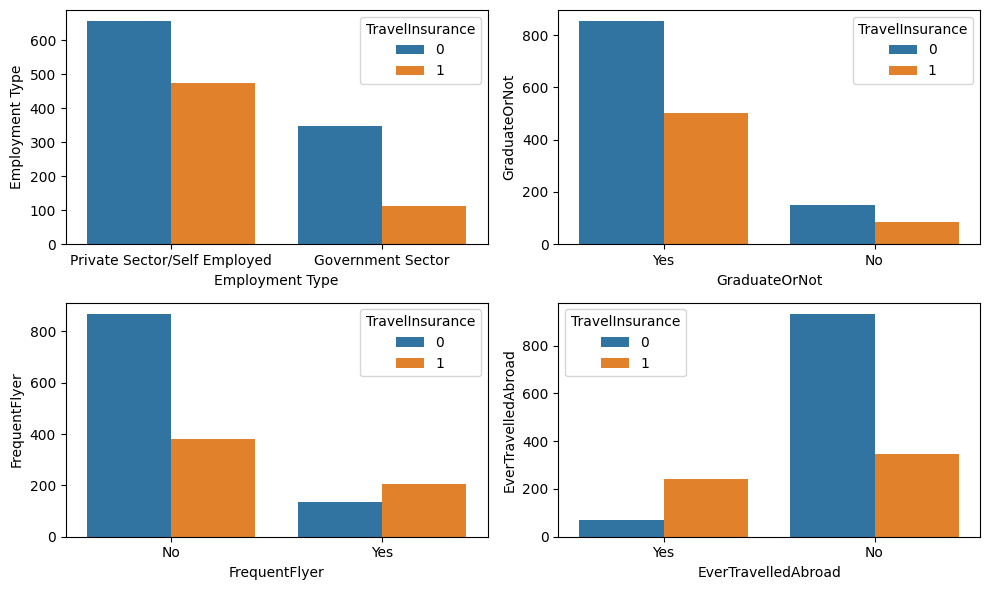

In [27]:
plt.figure(figsize=(10, 6))

for i,col in enumerate(cat_columns):
    plt.subplot(2, 2, i + 1)
    sns.countplot(new_train, x=col, hue=target_feature)
    plt.ylabel(f'{col}')

plt.tight_layout()
plt.show()

In [28]:
num_columns = new_train.select_dtypes(exclude=['object', 'category']).columns
num_columns

Index(['Unnamed: 0', 'Age', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases',
       'TravelInsurance'],
      dtype='object')

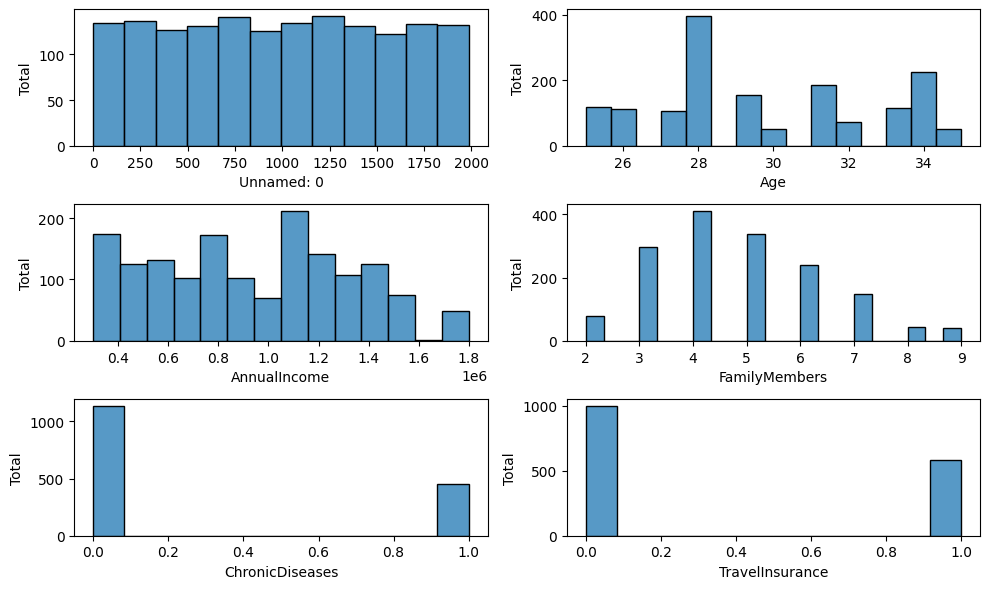

In [29]:
plt.figure(figsize=(10, 6))

for i,col in enumerate(num_columns):
  plt.subplot(3, 2, i + 1)
  sns.histplot(data=new_train, x=col)
  plt.ylabel('Total')

plt.tight_layout()
plt.show()

Debido a que nuestro modelo trabaja únicamente con variables numéricas, es necesario tratar nuestras variables categóricas para que sea posible incluirlas en el entrenamiento. Para esto realizaremos una codificación One Hot que, por cada variable categórica, crea k variables "dummy", donde k es el número de posibles valores de la variable original. Por ejemplo, anteriormente vimos que la variable `Employment Type` tiene dos posibles valores, por lo que se crearán dos nuevas variables, una representando el valor `Private Sector/Self Employed` y la otra representando el valor `Government Sector`. En ese orden de ideas usaremos la función `get_dummies()`, pasando por parámetro el conjunto de datos:

In [30]:
dumies = pd.get_dummies(new_train)
dumies

,Unnamed: 0,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance,Employment Type_Government Sector,Employment Type_Private Sector/Self Employed,GraduateOrNot_No,GraduateOrNot_Yes,FrequentFlyer_No,FrequentFlyer_Yes,EverTravelledAbroad_No,EverTravelledAbroad_Yes
252,252,29,1350000,5,1,1,False,True,False,True,True,False,False,True
904,904,28,300000,6,0,0,True,False,False,True,True,False,True,False
1428,1428,34,1300000,7,0,1,False,True,False,True,True,False,True,False
272,272,28,700000,3,1,0,False,True,False,True,True,False,True,False
1670,1670,34,1050000,8,1,1,False,True,False,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936,936,33,800000,3,0,0,True,False,False,True,True,False,True,False
1378,1378,34,1300000,2,1,0,True,False,False,True,True,False,True,False
757,757,27,500000,6,1,0,True,False,False,True,True,False,True,False
622,622,32,800000,5,0,0,True,False,False,True,False,True,True,False


La asociación entre las variables categóricas, puede ser visualizada mediante una matriz de Creamer.

In [31]:
def cramers_v(x, y):
  """Calcula la matriz de Cramer’s V entre dos variables categóricas."""
  confusion_matrix = pd.crosstab(x, y)  # Tabla de contingencia
  chi2 = stats.chi2_contingency(confusion_matrix)[0]  # Estadístico Chi-cuadrado
  n = confusion_matrix.sum().sum()  # Total de observaciones
  r, k = confusion_matrix.shape  # Dimensiones de la tabla
  return np.sqrt(chi2 / (n * (min(r, k) - 1)))  # Fórmula de Cramer’s V

def cramer_v_matrix(df):
  cat_cols = df.select_dtypes(include=['object', 'category']).columns
  matrix = pd.DataFrame(index=cat_cols, columns=cat_cols)

  for col1 in cat_cols:
    for col2 in cat_cols:
      if col1 == col2:
        matrix.loc[col1, col2] = 1.0  # Asociación perfecta
      else:
        matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

  return matrix.astype(float)

In [32]:
association_matrix = cramer_v_matrix(new_train)

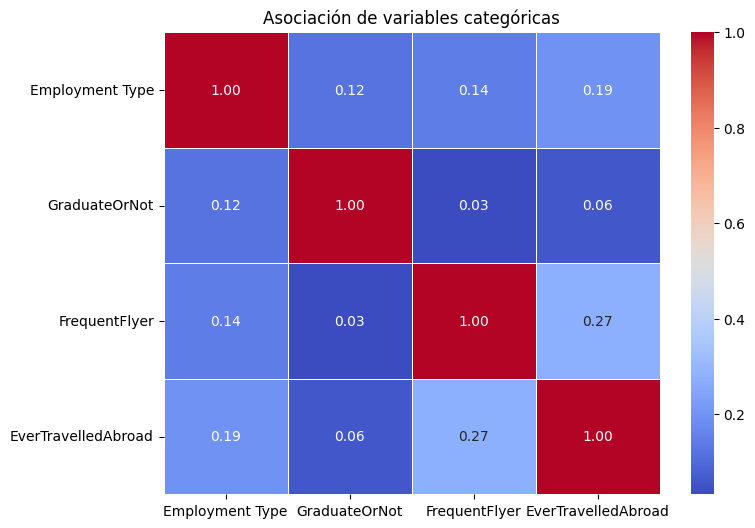

In [33]:
plt.figure(figsize=(8, 6))
sns.heatmap(association_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Asociación de variables categóricas")
plt.show()

## 2.5. Insights obtenidos de la información.

Los datos tienen un total de 10 variables o características, un total de 1.589 instancias. No tiene instancias (filas) duplicadas.
Los tipos de datos para las variables se distribuyen de la siguiente forma:
* 6 numéricas.
* 4 categóricas.


In [34]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1589 entries, 252 to 1629
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1589 non-null   int64 
 1   Age                  1589 non-null   int64 
 2   Employment Type      1589 non-null   object
 3   GraduateOrNot        1589 non-null   object
 4   AnnualIncome         1589 non-null   int64 
 5   FamilyMembers        1589 non-null   int64 
 6   ChronicDiseases      1589 non-null   int64 
 7   FrequentFlyer        1589 non-null   object
 8   EverTravelledAbroad  1589 non-null   object
 9   TravelInsurance      1589 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 201.1+ KB


Las recomendaciones de tratamiento de la información para cada una de las características, son las siguientes:

| ATRIBUTO | DEFINICIÓN |
| :- | :- |
| **Unnamed: 0** | Es recomendable eliminar la característica.|
| **Age** | Es recomendable escalar la variable.|
| **Employment Type** | Al ser una variable categórica es necesario transformar codificarla para datos numéricos.|
| **GraduateOrNot** | Al ser una variable categórica es necesario transformar codificarla para datos numéricos|
| **AnnualIncome** | Es recomendable escalar la variable.|
| **FamilyMembers** | Se recomienda mantener la variable con los valores originales.|
| **ChronicDiseases** | Se recomienda mantener la variable con los valores originales.|
| **FrequentFlyer** | Al ser una variable categórica es necesario transformar codificarla para datos numéricos. |
| **EverTravelledAbroad** | Al ser una variable categórica es necesario transformar codificarla para datos numéricos. |

En resúmen:

Variables a eliminar:

* Unnamed: 0

Variables numéricas:

* Age.
* AnnualIncome.
* FamilyMembers.
* ChronicDiseases.

Variables categóricas o de texto:

* Employment Type: Aplicaremos un OneHotEncoder para las 2 categorías.
* GraduateOrNot: Aplicaremos un OneHotEncoder para las 2 categorías.
* FrequentFlyer: Aplicaremos un OneHotEncoder para las 2 categorías.
* EverTravelledAbroad: Aplicaremos un OneHotEncoder para las 2 categorías.

Esto nos generaría un modelo de 12 variables.


## 2.6. Preparación de la información.

Generamos una copia de los conjuntos de datos:

In [35]:
new_train_ = new_train.copy()
new_test_ = test.copy()

De acuerdo con todo el análisis exploratorio, procedemos en primera instancia a definir las características que serán eliminadas y la eliminación de los valores ausentes:

In [36]:
drop_fields = ["Unnamed: 0"]
drop_fields

['Unnamed: 0']

Generamos funciones para el borrado de las columnas y eliminación de valores ausentes:

In [37]:
#Función de borrado de features no usados
def drop_features(train_, test_, features):
  train_temp = train_.copy()
  test_temp = test_.copy()
  train_temp = train_temp.drop(features, axis=1)
  test_temp = test_temp.drop(features, axis=1)

  return train_temp, test_temp

def drop_duplicates(train_, test_):
  train_temp = train_.copy()
  test_temp = test_.copy()
  print(f"El número de registros antes de borrar duplicados es:")
  print(f"Train: {train_temp.shape[0]}")
  print(f"Test: {test_temp.shape[0]}")
  train_ = train_temp.drop_duplicates()
  test_ = test_temp.drop_duplicates()
  print("-----")
  print(f"El número de registros después de borrar duplicados es:")
  print(f"Train: {train_.shape[0]}")
  print(f"Test: {test_.shape[0]}")

  return train_, test_

In [38]:
#Ejecutamos las funciones de limpieza de la información
new_train_, new_test_ = drop_features(new_train_, new_test_, drop_fields)
new_train_, new_test_ = drop_duplicates(new_train_, new_test_)

El número de registros antes de borrar duplicados es:
Train: 1589
Test: 398
-----
El número de registros después de borrar duplicados es:
Train: 1069
Test: 354


In [39]:
print(f"El número de características (features) ahora es: {new_train_.shape[1]}")

El número de características (features) ahora es: 9


Procedemos a verificar los tipos de datos con miras a generar los Pipeline:

Compilamos los nombres de las características numéricas en una sola variable:

In [40]:
num_fields = new_train_.select_dtypes(include=[np.number]).columns.tolist()
num_fields

['Age', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases', 'TravelInsurance']

Hacemos ahora lo mismo para las numéricas:

In [41]:
cat_fields = new_train_.select_dtypes(exclude=[np.number]).columns.tolist()
cat_fields

['Employment Type', 'GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad']

---
# 3. Modelamiento.

##3.1. Preparación de los datos.

In [42]:
new_train_

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
252,29,Private Sector/Self Employed,Yes,1350000,5,1,No,Yes,1
904,28,Government Sector,Yes,300000,6,0,No,No,0
1428,34,Private Sector/Self Employed,Yes,1300000,7,0,No,No,1
272,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
1670,34,Private Sector/Self Employed,Yes,1050000,8,1,No,No,1
...,...,...,...,...,...,...,...,...,...
834,33,Private Sector/Self Employed,Yes,1400000,5,1,Yes,Yes,1
1695,35,Government Sector,Yes,1100000,5,0,No,No,0
308,34,Private Sector/Self Employed,Yes,1000000,9,1,No,No,0
936,33,Government Sector,Yes,800000,3,0,No,No,0


In [43]:
X_train, Y_train = new_train_.drop([target_feature], axis=1), new_train_[target_feature]
display(X_train)
display(Y_train)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
252,29,Private Sector/Self Employed,Yes,1350000,5,1,No,Yes
904,28,Government Sector,Yes,300000,6,0,No,No
1428,34,Private Sector/Self Employed,Yes,1300000,7,0,No,No
272,28,Private Sector/Self Employed,Yes,700000,3,1,No,No
1670,34,Private Sector/Self Employed,Yes,1050000,8,1,No,No
...,...,...,...,...,...,...,...,...
834,33,Private Sector/Self Employed,Yes,1400000,5,1,Yes,Yes
1695,35,Government Sector,Yes,1100000,5,0,No,No
308,34,Private Sector/Self Employed,Yes,1000000,9,1,No,No
936,33,Government Sector,Yes,800000,3,0,No,No


,TravelInsurance
252,1
904,0
1428,1
272,0
1670,1
...,...
834,1
1695,0
308,0
936,0


In [44]:
X_test, Y_test = new_test_.drop([target_feature], axis=1), new_test_[target_feature]
display(X_test)
display(Y_test)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
163,32,Government Sector,Yes,350000,5,0,No,No
1638,29,Private Sector/Self Employed,Yes,1200000,4,0,No,No
262,26,Private Sector/Self Employed,Yes,750000,4,1,No,No
721,34,Private Sector/Self Employed,Yes,1050000,4,0,No,No
714,28,Government Sector,Yes,300000,4,0,No,No
...,...,...,...,...,...,...,...,...
609,28,Private Sector/Self Employed,Yes,700000,7,1,Yes,Yes
1493,32,Government Sector,Yes,900000,6,1,No,No
161,34,Private Sector/Self Employed,No,1400000,3,1,No,Yes
1668,29,Private Sector/Self Employed,Yes,350000,9,0,No,No


,TravelInsurance
163,0
1638,1
262,0
721,0
714,0
...,...
609,1
1493,0
161,1
1668,0


##3.2. Funciones y variables de apoyo.

Función para cálculo de tiempo, ideal para procesos extensos:

In [45]:
def timer(start_time=None):
  if not start_time:
    start_time = datetime.now()
    return start_time
  elif start_time:
    thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
    tmin, tsec = divmod(temp_sec, 60)
    print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

Para visualizar la matriz de confusión:

In [46]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,size=(4, 4)):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots(figsize=size)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Para visualizar la curva ROC:

In [47]:
def display_multiple_models_roc_curve(models, X, y):
  # Below for loop iterates through your models list
  for m in models:
    model = m['model'] # select the model
    y_pred=model.predict(X) # predict the test data
    # Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y, model.predict_proba(X)[:,1])
    # Calculate Area under the curve to display on the plot
    auc = roc_auc_score(y,y_pred)
    # Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
  # Custom settings for the plot
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('1-Specificity(False Positive Rate)')
  plt.ylabel('Sensitivity(True Positive Rate)')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc="lower right")
  plt.show()   # Display

## 3.3. Modelo base.

#### 3.3.1. Construcción del pipeline.

Iniciamos la construcción de los pasos del pipeline de pre-procesamiento de información:

In [48]:
num_transformer1 = Pipeline(
    steps=[
        ('scaler', MinMaxScaler())
    ]
)

In [49]:
num_transformer2 = Pipeline(
    steps=[
        ('scaler', StandardScaler())
    ]
)

In [50]:
num_transformer3 = Pipeline(
    steps=[
        ('scaler', 'passthrough')
    ]
)

In [51]:
cat_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ]
)

In [52]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num1", num_transformer1, ["Age"]),
        ("num2", num_transformer2, ["AnnualIncome"]),
        ("num3", num_transformer3, ["FamilyMembers", "ChronicDiseases"]),
        ("cat", cat_transformer, cat_columns)
    ]
)

Vamos a resumir los 4 pasos anteriores y lo que ocurre en cada uno de ellos:

1. `num1`: Toma los valores numéricos de la variable `Age` y aplica un escalador tipo `MinMaxScaler`.
2. `num2`: Para la variable `AnnualIncome` transforma los datos con el tipo `StandardScaler`.
3. `cat`: Aplica una transformación de tipo OneHotEncoder para todas las variables categóricas del modelo.

In [53]:
#Vista previa de cómo va el preprocesamiento de información hasta este momento:
pipe = Pipeline(steps=[
    ('column_transformer', preprocessor)
])

pipe

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(transformers=[('num1',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age']),
                                                 ('num2',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['AnnualIncome']),
                                                 ('num3',
                                                  Pipeline(steps=[('scaler',
                                                                   'passthrough')]),
                                                  ['FamilyMembers',
                                                   'ChronicDiseases']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Employment Type', 'GraduateOrNot', 'FrequentFlyer',
       'EverTravelledAbroad'],
      dtype='object'))]))])

La previsualización nos permitirá también apoyarnos para conocer si el Pipeline es o no correcto:

In [54]:
pipe.fit_transform(X_train)

array([[ 0.4       ,  1.15970893,  5.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.3       , -1.74460898,  6.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.9       ,  1.02140808,  7.        , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.9       ,  0.19160296,  9.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.8       , -0.36160045,  3.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.9       ,  1.02140808,  2.        , ...,  0.        ,
         1.        ,  0.        ]])

A continuación, vamos a realizar una verificación adicional para conocer si las columnas están ensambladas correctamente:

In [55]:
pipe.get_feature_names_out()

array(['num1__Age', 'num2__AnnualIncome', 'num3__FamilyMembers',
       'num3__ChronicDiseases', 'cat__Employment Type_Government Sector',
       'cat__Employment Type_Private Sector/Self Employed',
       'cat__GraduateOrNot_No', 'cat__GraduateOrNot_Yes',
       'cat__FrequentFlyer_No', 'cat__FrequentFlyer_Yes',
       'cat__EverTravelledAbroad_No', 'cat__EverTravelledAbroad_Yes'],
      dtype=object)

In [56]:
pipe['column_transformer'].transformers_[2][2]

['FamilyMembers', 'ChronicDiseases']

In [57]:
num_column_names = np.concatenate([
    pipe['column_transformer'].transformers_[0][1].feature_names_in_,
    pipe['column_transformer'].transformers_[1][1].feature_names_in_,
    pipe['column_transformer'].transformers_[2][2]
])

num_column_names

array(['Age', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases'],
      dtype=object)

In [58]:
cat_column_names = pipe['column_transformer'].transformers_[3][1].get_feature_names_out()
cat_column_names

array(['Employment Type_Government Sector',
       'Employment Type_Private Sector/Self Employed', 'GraduateOrNot_No',
       'GraduateOrNot_Yes', 'FrequentFlyer_No', 'FrequentFlyer_Yes',
       'EverTravelledAbroad_No', 'EverTravelledAbroad_Yes'], dtype=object)

In [59]:
col_names = list(num_column_names) + list(cat_column_names)
col_names

['Age',
 'AnnualIncome',
 'FamilyMembers',
 'ChronicDiseases',
 'Employment Type_Government Sector',
 'Employment Type_Private Sector/Self Employed',
 'GraduateOrNot_No',
 'GraduateOrNot_Yes',
 'FrequentFlyer_No',
 'FrequentFlyer_Yes',
 'EverTravelledAbroad_No',
 'EverTravelledAbroad_Yes']

O puedes ver todas en una sola instrucción:

In [60]:
pipe.get_feature_names_out()

array(['num1__Age', 'num2__AnnualIncome', 'num3__FamilyMembers',
       'num3__ChronicDiseases', 'cat__Employment Type_Government Sector',
       'cat__Employment Type_Private Sector/Self Employed',
       'cat__GraduateOrNot_No', 'cat__GraduateOrNot_Yes',
       'cat__FrequentFlyer_No', 'cat__FrequentFlyer_Yes',
       'cat__EverTravelledAbroad_No', 'cat__EverTravelledAbroad_Yes'],
      dtype=object)

#### 3.3.2. Modelado.

A continuación, encontrarás el uso de los parámetros más relevantes para SVM.

* `C`: Asigna el valor de regularización.
* `kernel`: Define la función sobre la cuál se transformarán los datos. Puede tomar valores ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']. En el caso que no sea explícitamente declarado, asumirá automática el valor 'rbf' para este parámetro.
* `gamma`: Coeficiente kernel coefficient para los valores **rbf**, **poly** y **sigmoid**. Puede tomar los valores ['scale', 'auto']. En el caso que no sea explícitamente declarado, asumirá automática el valor **scale** para este parámetro.
* `degree`: Grado del polinomio. Debe ser positivo es ignorado el valor por otros.
* `class_weight`: Permite relacionar el valor de los pesos de cada variable o calcular los pesos basados en la frecuencia de los datos, esto ocurrir al seleccionar **balanced**. En el caso que no sea explícitamente declarado, asumirá automática el valor **None**.

En la variable `estimators_bm` vamos a configurar los siguientes valores:

* `transform` que contiene el preprocesamiento de la información.
* `classifier` con la información del estimador, que en este caso corresponderá a `SVC`, dónde especificaremos el valor del kernel, la probabilidad y la semilla de reproducibilidad `random_state`.

In [61]:
%%time
estimators_bm = [
        ('transform', preprocessor),
        ('classifier', SVC(kernel='rbf', probability=True, random_state=my_seed))
]

pipe_bm = Pipeline(estimators_bm)

CPU times: user 42 µs, sys: 8 µs, total: 50 µs
Wall time: 53.9 µs


#### 3.3.3. Entrenamiento.

Iniciamos el proceso de entrenamiento, apoyándonos de una función que permitirá contabilizar la duración de este proceso.

In [62]:
start_time = timer(None)
pipe_bm.fit(X_train, Y_train)
timer(start_time) # Función para visualizar la duración del proceso, recomendado para procesos extensos y cuantificar este tiempo.


 Time taken: 0 hours 0 minutes and 0.54 seconds.


In [63]:
y_pred_train_bm = pipe_bm.predict(X_train)
y_pred_train_bm

array([1, 0, 0, ..., 0, 0, 0])

Vamos a ver ahora el comportamiento de la matriz de confusión para el modelo base:

Confusion matrix, without normalization


<Axes: title={'center': 'Matriz de Confusión'}, xlabel='Predicted label', ylabel='True label'>

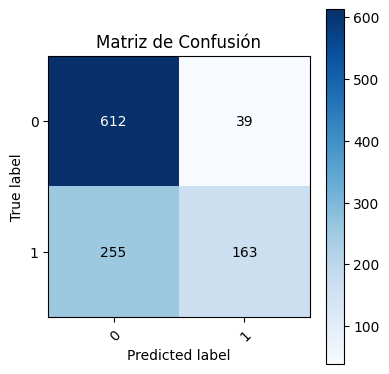

In [64]:
classes = pipe_bm[1].classes_
plot_confusion_matrix(y_true=Y_train, y_pred=y_pred_train_bm, classes=classes,
                      title='Matriz de Confusión')

Es el turno de las métricas para el entrenamiento:

In [65]:
train_report_bm = classification_report(Y_train, y_pred_train_bm)
print("Train Report\n", train_report_bm)

Train Report
               precision    recall  f1-score   support

           0       0.71      0.94      0.81       651
           1       0.81      0.39      0.53       418

    accuracy                           0.72      1069
   macro avg       0.76      0.67      0.67      1069
weighted avg       0.75      0.72      0.70      1069



Dado que estamos clasificando 2 valores, podremos mediante la curva ROC, dónde el eje X representa la tasa de falsos positivos, mientras que el eje Y representa los verdaderos positivos.

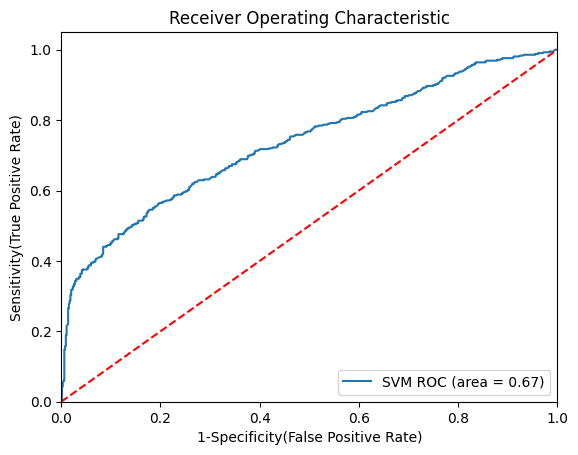

In [66]:
models = [
    {
        'label': 'SVM',
        'model': pipe_bm,
    }
]

display_multiple_models_roc_curve(models, X_train, Y_train)

## 3.4. Búsqueda de hiperparámetros.

#### 3.4.1. Pipeline.

Recuerda los pasos del [pipeline](#scrollTo=t48eP6ejvwp_) del modelo base, compuesto por los valores:

* **transform**: Preprocesamiento de los datos.
* **classifier**: Estimador o clasificador, que corresponde al SVC.

In [67]:
preprocessor

ColumnTransformer(transformers=[('num1',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['Age']),
                                ('num2',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['AnnualIncome']),
                                ('num3',
                                 Pipeline(steps=[('scaler', 'passthrough')]),
                                 ['FamilyMembers', 'ChronicDiseases']),
                                ('cat',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['Employment Type', 'GraduateOrNot', 'FrequentFlyer',
       'EverTravelledAbroad'],
      dtype='object'))])

#### 3.4.2. ¿Cómo construir el grid?

Ahora bien, cuál es la estructura apropiada para buscar hiperparámetros, en primero lugar va el nombre de alguno de los 2 pasos, seguido del nombre del parámetro, por ejemplo, si quieremos ajustar el valor de C en el clasificador, debe ser nombrado de la siguiente forma:

* El nombre del parámetro es classifier.
* Parámetro a explorar es C.

La combinación de los anteriores nos da como resultado:
`classifier__C`

Pero como ahora vamos a experimentar tanto para el preprocesamiento (lo llamamos `transform` en el pipeline) como para el clasificador (lo llamamos `classifier` en el pipeline), vamos a desarrollar el siguiente flujo:

1. `num1`: En el modelo base se apoyaba de un `MinMaxScaler`, experimentaremos con `StandardScaler` y no ejecute ninguna acción `passthrough`.
2. `num2`: En el modelo base se apoyaba de un `StandardScaler`, experimentaremos con `MinMaxScaler` y no ejecute ninguna acción `passthrough`.
3. `num3`: En el modelo base no aplicamos ninguna transformación, vamos a esperimentar con `MinMaxScaler`, `StandardScaler`, `RobustScaler` y no ejecute ninguna acción `passthrough.
4. `cat`: En el modelo base aplicaba una transformación de tipo OneHotEncoder para todas las variables categóricas del modelo, este paso lo mantendremos fijo dado que requerimos valores numéricos.

```
param_grid = {
    'transform__num1__scaler': [MinMaxScaler(), StandardScaler(), 'passthrough'],
    'transform__num2__scaler': [StandardScaler(), MinMaxScaler(), 'passthrough'],
    'transform__num3__scaler': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough'],
    'transform__cat__encoder': [OneHotEncoder()]
}
```



¿Nuestro Grid se encuentra listo?, ¿permitiría experimentar?, la respuesta es si, no obstante no está ejecutando ninguna acción para el clasificador, vamos a experimentar con los parámetros del **kernel**, **C** y **class_weight**.

```
param_grid = {
    'transform__num1__scaler': [MinMaxScaler(), StandardScaler(), 'passthrough'],
    'transform__num2__scaler': [StandardScaler(), MinMaxScaler(), 'passthrough'],
    'transform__num3__scaler': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough'],
    'transform__cat__encoder': [OneHotEncoder()],
    'classifier__kernel': ['rbf'],
    'classifier__gamma': ['scale', 'auto']
}
```

#### 3.4.3. Implementación.

Ya que lo hemos comprendido los pasos, pasamos a la implementación en código:

In [68]:
estimators = [
    ('transform', preprocessor),
    ('classifier', SVC(probability=True, random_state=my_seed))
]

pipe_hip = Pipeline(estimators)
pipe_hip

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num1',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age']),
                                                 ('num2',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['AnnualIncome']),
                                                 ('num3',
                                                  Pipeline(steps=[('scaler',
                                                                   'passthrough')]),
                                                  ['FamilyMembers',
                                                   'ChronicDiseases']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Employment Type', 'GraduateOrNot', 'FrequentFlyer',
       'EverTravelledAbroad'],
      dtype='object'))])),
                ('classifier', SVC(probability=True, random_state=19))])

In [69]:
param_grid = {
    'transform__num1__scaler': [MinMaxScaler(), StandardScaler(), 'passthrough'],
    'transform__num2__scaler': [StandardScaler(), MinMaxScaler(), 'passthrough'],
    'transform__num3__scaler': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough'],
    'transform__cat__encoder': [OneHotEncoder()],
    'classifier__kernel': ['rbf'],
    'classifier__gamma': ['scale', 'auto']
}

In [70]:
grid_search = GridSearchCV(pipe_hip, param_grid, verbose=2, scoring='precision_macro', cv=3, n_jobs=-1)

In [71]:
%%time
start_time = timer(None)
grid_search.fit(X_train, Y_train)
timer(start_time)

Fitting 3 folds for each of 72 candidates, totalling 216 fits

 Time taken: 0 hours 0 minutes and 38.28 seconds.
CPU times: user 1.38 s, sys: 159 ms, total: 1.54 s
Wall time: 38.3 s


Obtenemos el mejor modelo con sus estimadores correspondientes.

In [72]:
best_model = grid_search.best_estimator_

El resumen de los experimentos del Grid:

In [73]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__gamma,param_classifier__kernel,param_transform__cat__encoder,param_transform__num1__scaler,param_transform__num2__scaler,param_transform__num3__scaler,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.429884,0.074073,0.102099,0.013887,scale,rbf,OneHotEncoder(),MinMaxScaler(),StandardScaler(),StandardScaler(),"{'classifier__gamma': 'scale', 'classifier__ke...",0.754709,0.731462,0.739956,0.742042,0.009605,38
1,0.367076,0.118264,0.061877,0.033244,scale,rbf,OneHotEncoder(),MinMaxScaler(),StandardScaler(),MinMaxScaler(),"{'classifier__gamma': 'scale', 'classifier__ke...",0.756079,0.810655,0.722284,0.763006,0.036408,15
2,0.394789,0.029279,0.054339,0.022198,scale,rbf,OneHotEncoder(),MinMaxScaler(),StandardScaler(),RobustScaler(),"{'classifier__gamma': 'scale', 'classifier__ke...",0.761504,0.759431,0.742762,0.754566,0.008389,21
3,0.388451,0.056444,0.084250,0.011010,scale,rbf,OneHotEncoder(),MinMaxScaler(),StandardScaler(),passthrough,"{'classifier__gamma': 'scale', 'classifier__ke...",0.721960,0.734057,0.731159,0.729059,0.005157,46
4,0.317284,0.101148,0.039932,0.000536,scale,rbf,OneHotEncoder(),MinMaxScaler(),MinMaxScaler(),StandardScaler(),"{'classifier__gamma': 'scale', 'classifier__ke...",0.684015,0.731311,0.703477,0.706268,0.019409,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.198124,0.000756,0.035773,0.001072,auto,rbf,OneHotEncoder(),passthrough,MinMaxScaler(),passthrough,"{'classifier__gamma': 'auto', 'classifier__ker...",0.731853,0.733433,0.704329,0.723205,0.013363,49
68,0.245774,0.011903,0.043067,0.001629,auto,rbf,OneHotEncoder(),passthrough,passthrough,StandardScaler(),"{'classifier__gamma': 'auto', 'classifier__ker...",0.742273,0.782394,0.683794,0.736154,0.040485,43
69,0.234435,0.003195,0.042795,0.001844,auto,rbf,OneHotEncoder(),passthrough,passthrough,MinMaxScaler(),"{'classifier__gamma': 'auto', 'classifier__ker...",0.752894,0.763786,0.680614,0.732431,0.036909,44
70,0.248140,0.013040,0.042472,0.000769,auto,rbf,OneHotEncoder(),passthrough,passthrough,RobustScaler(),"{'classifier__gamma': 'auto', 'classifier__ker...",0.775809,0.797231,0.684837,0.752626,0.048725,22


Los mejores resultados del proceso de experimentación:

In [74]:
grid_search.best_params_

{'classifier__gamma': 'auto',
 'classifier__kernel': 'rbf',
 'transform__cat__encoder': OneHotEncoder(),
 'transform__num1__scaler': MinMaxScaler(),
 'transform__num2__scaler': 'passthrough',
 'transform__num3__scaler': MinMaxScaler()}

In [75]:
supp_vectors = best_model[1].support_vectors_
supp_ = best_model[1].support_
dual_coefs = best_model[1].dual_coef_

In [76]:
supp_vectors_df = pd.DataFrame(supp_vectors, columns=best_model[0].get_feature_names_out())
supp_vectors_df

,num1__Age,num2__AnnualIncome,num3__FamilyMembers,num3__ChronicDiseases,cat__Employment Type_Government Sector,cat__Employment Type_Private Sector/Self Employed,cat__GraduateOrNot_No,cat__GraduateOrNot_Yes,cat__FrequentFlyer_No,cat__FrequentFlyer_Yes,cat__EverTravelledAbroad_No,cat__EverTravelledAbroad_Yes
0,0.7,650000.0,0.428571,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.8,1400000.0,0.857143,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
2,0.3,800000.0,0.285714,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
3,0.2,500000.0,0.857143,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0.9,1400000.0,0.285714,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
716,0.9,1000000.0,0.571429,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
717,0.0,1150000.0,0.285714,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
718,0.6,1400000.0,0.000000,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
719,0.3,1100000.0,0.000000,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0


In [77]:
print("Vectores soporte:\n", supp_vectors)
print("Índices de los vectores soporte:", supp_)
print("Pesos de los vectores soporte:", dual_coefs)

Vectores soporte:
 [[7.00000000e-01 6.50000000e+05 4.28571429e-01 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [8.00000000e-01 1.40000000e+06 8.57142857e-01 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [3.00000000e-01 8.00000000e+05 2.85714286e-01 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 ...
 [6.00000000e-01 1.40000000e+06 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [3.00000000e-01 1.10000000e+06 0.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [9.00000000e-01 5.00000000e+05 7.14285714e-01 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]]
Índices de los vectores soporte: [   5   11   14   17   20   21   24   25   26   28   29   35   42   43
   44   45   51   52   53   54   56   58   60   64   68   69   72   77
   78   79   80   82   84   85   86   87   91   93   94   97   99  103
  108  110  115  120  121  122  124  127  129  133  136  138  140  141
  142  143  145  147  150  151  152  159  161  164  165  166  16

De acuerdo con lo anterior, ¿cómo interpretas los valores anteriores?

#### 3.4.4. Evaluación.

In [78]:
y_pred_train_hip = best_model.predict(X_train)
y_pred_train_hip

array([1, 0, 0, ..., 0, 0, 0])

Confusion matrix, without normalization


<Axes: title={'center': 'Matriz de Confusión'}, xlabel='Predicted label', ylabel='True label'>

<Figure size 200x200 with 0 Axes>

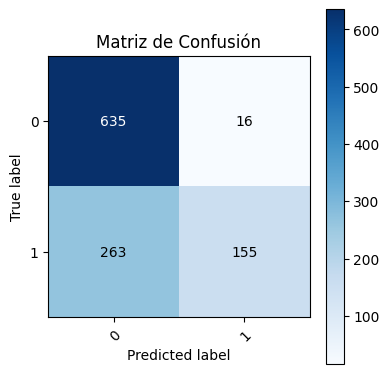

In [79]:
plt.figure(figsize=(2, 2))
classes = best_model.classes_
plot_confusion_matrix(y_true=Y_train, y_pred=y_pred_train_hip, classes=classes,
                      title='Matriz de Confusión')

In [80]:
train_report_hip = classification_report(Y_train, y_pred_train_hip)
print("Train Report\n", train_report_hip)

Train Report
               precision    recall  f1-score   support

           0       0.71      0.98      0.82       651
           1       0.91      0.37      0.53       418

    accuracy                           0.74      1069
   macro avg       0.81      0.67      0.67      1069
weighted avg       0.79      0.74      0.71      1069



Veamos la curva ROC:

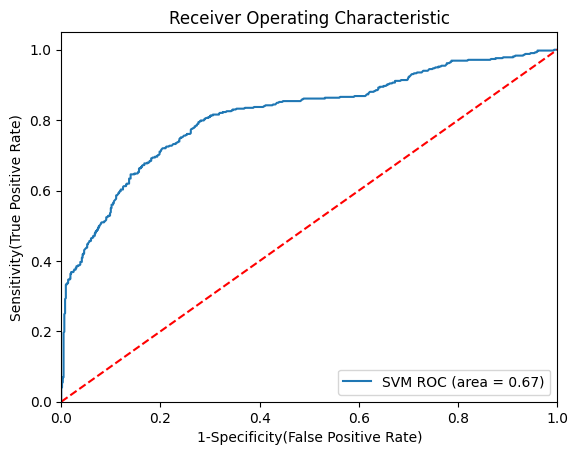

In [81]:
models = [
    {
        'label': 'SVM',
        'model': best_model,
    }
]

display_multiple_models_roc_curve(models, X_train, Y_train)

### 3.4.5. Datos que no conoce.

In [82]:
y_pred_test_hip = best_model.predict(X_test)
y_pred_test_hip

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,

Confusion matrix, without normalization


<Axes: title={'center': 'Matriz de Confusión'}, xlabel='Predicted label', ylabel='True label'>

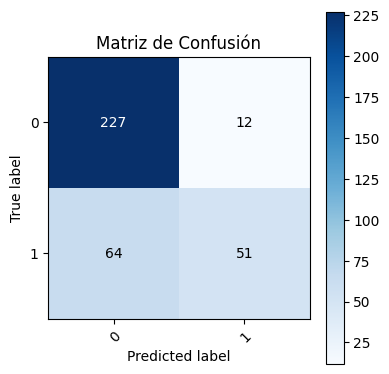

In [83]:
classes = best_model.classes_
plot_confusion_matrix(y_true=Y_test, y_pred=y_pred_test_hip, classes=classes,
                      title='Matriz de Confusión')

In [84]:
test_report_hip = classification_report(Y_test, y_pred_test_hip)
print("Test Report\n", test_report_hip)

Test Report
               precision    recall  f1-score   support

           0       0.78      0.95      0.86       239
           1       0.81      0.44      0.57       115

    accuracy                           0.79       354
   macro avg       0.79      0.70      0.71       354
weighted avg       0.79      0.79      0.76       354



La curva ROC:

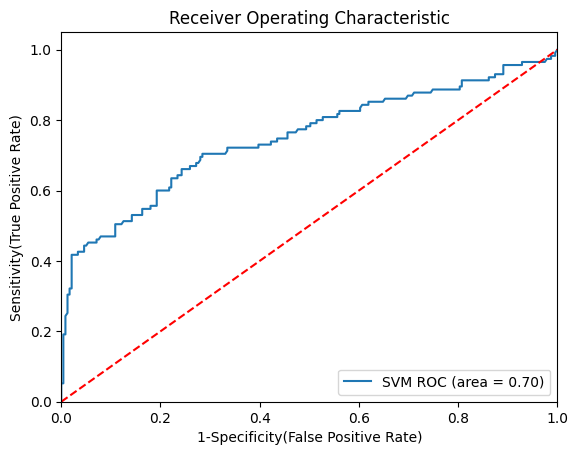

In [85]:
display_multiple_models_roc_curve(models, X_test, Y_test)

### 3.4.6. Ejemplo de clasificación con el mejor modelo.

Ahora veremos cómo se realiza una clasificación sobre un único dato. Empezaremos definiendo la variable `x_clasif` con uno de los valores del conjunto de test. Ten en cuenta que realizaremos nuestra predicción partiendo de la variable `x_test`, por lo que nuestro dato está codificado y estandarizado:

In [86]:
x_clasif = X_test.iloc[[0]]
x_clasif

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
163,32,Government Sector,Yes,350000,5,0,No,No


Utilizaremos `predict_proba` para realizar la clasificación. Esta función necesita un arreglo de datos, por lo que pasaremos como parámetro un arreglo con una única posición. Almacenaremos el resultado en la variable `y_clasif`:

In [87]:
y_clasif = best_model.predict_proba(x_clasif)
y_clasif

array([[0.72143168, 0.27856832]])

Vamos a verlo ahora más bonito:

In [88]:
prob_df = pd.DataFrame(y_clasif, columns=best_model.classes_)
prob_df

,0,1
0,0.721432,0.278568


# 4. Despliegue.

Teniendo en cuenta que los rendimientos del mejor modelo son buenos, es posible que pensemos en los pasos que nos permitan realizar el proceso de despliegue en scikit learn.

Vveremos cómo persistir los modelos creados con `scikit_learn` mediante la librería `joblib`, que nos permite almacenar objetos de Python en archivos. Esta librería está optimizada para almacenar objetos con gran cantidad de arreglos numéricos, como nuestro `best_model`. Primero crearemos el archivo con la función `dump()`, especificando el objeto a almacenar y el nombre del archivo (que tiene extensión `.joblib`):

In [89]:
joblib.dump(best_model, 'mySvcModel.joblib')

['mySvcModel.joblib']

Si queremos recuperar el modelo, utilizaremos la función `load()`, especificando como parámetro la ruta del archivo creado previamente:

In [90]:
deployment_model = joblib.load('mySvcModel.joblib')

Con el modelo cargado podemos, por ejemplo, realizar la clasificación del mismo dato que utilizamos anteriormente:

In [91]:
deployment_model.predict_proba(x_clasif)

array([[0.72143168, 0.27856832]])

---
# 5. Preguntas

* ¿Hay desbalanceo de datos? ¿Como harías para combatirlo?.
* Si en la SVC el parámetro probability cambia a False, ¿podrías ver la probabilidad de cada predicción?
* ¿Qué interpretas de la curva ROC para el modelo base como para los hiperparámeros?
* ¿Consideras que existen otras alternativas para el procesamiento de la información?.
* Consideras que podrías experimentar buscar otros hiperparámetros, ¿cuáles?